In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# definitions
def make_waterfall_plot(data: pd.Series, color: str) -> plt.figure:
    """Given a pd.Series makes a waterfall plot in order of labels given."""
    diff = data.diff()
    diff.iloc[0] = 0
    heights = diff.apply(lambda x: abs(x)) # heights of bars
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.grid(True, alpha=0.5)
    bars = ax.bar(x=range(len(data)), height=heights.values, bottom=data.values, width=0.5, edgecolor=color, linewidth=2, color=color)
    labels = diff.copy()
    labels.iloc[0] = data.iloc[0]
    labels.iloc[-1] = data.iloc[-1]
    for bar, value in zip(bars, labels.values):
        height = bar.get_height()
        position = bar.get_y() + height
        ax.annotate(f'{int(value)}', xy=(bar.get_x() + bar.get_width() / 2, position),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom')
    ax.set_ylabel('Count')
    ax.set_xticks(ticks=range(len(data)))
    ax.set_xticklabels(data.keys(), fontsize=12)
    ax.set_xticklabels(data.index, rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.close(fig)  # Close the figure to prevent displaying multiple times in Jupyter notebook
    return fig
def make_histogram_plot(data: pd.Series, color: str) -> plt.figure:
    """Given a pd.Series makes a histogram plot."""
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.grid(True, alpha=0.5)
    bars = ax.bar(x=range(len(data)), height=data.values, width=0.5, edgecolor=color, linewidth=2, color=color)
    for bar, value in zip(bars, data.values):
        height = bar.get_height()
        position = bar.get_y() + height
        ax.annotate(f'{int(value)}', xy=(bar.get_x() + bar.get_width() / 2, position),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom')
    ax.set_ylabel('Count')
    ax.set_xticks(ticks=range(len(data)))
    ax.set_xticklabels(data.index, rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.close(fig)  # Close the figure to prevent displaying multiple times in Jupyter notebook
    return fig

In [77]:
df = pd.read_pickle('justretroquery_syndirella_master.pkl.gz')
df

,smiles,compound_set,template,hit1,hit2,route0,route0_names,route0_CAR,route0_non_CAR,route1,...,route2_CAR,route2_non_CAR,route3,route3_names,route3_CAR,route3_non_CAR,route4,route4_names,route4_CAR,route4_non_CAR
0,Cn1nccc1C(=O)NCc1csc(-c2ncn[nH]2)n1,CHIKVMac-DLS-JA001,cx0281a,cx0892a,cx0281a,"[{'name': 'Sp2-sp2_Suzuki_coupling', 'reactant...",[Sp2-sp2_Suzuki_coupling],True,None,"[{'name': 'Sp2-sp2_Suzuki_coupling', 'reactant...",...,True,None,"[{'name': 'Sp2-sp2_Suzuki_coupling', 'reactant...",[Sp2-sp2_Suzuki_coupling],True,None,"[{'name': 'Sp2-sp2_Suzuki_coupling', 'reactant...",[Sp2-sp2_Suzuki_coupling],True,None
1,Cc1nsc(N[C@@H]2CCC[C@H]2c2csc(-c3nc[nH]n3)n2)n1,CHIKVMac-DLS-JA002,cx0281a,cx0406a,cx0281a,"[{'name': 'Buchwald-Hartwig_amination', 'react...",[Buchwald-Hartwig_amination],True,None,[{'name': 'N-nucleophilic_aromatic_substitutio...,...,True,None,[{'name': 'N-nucleophilic_aromatic_substitutio...,[N-nucleophilic_aromatic_substitution],True,None,[{'name': 'N-nucleophilic_aromatic_substitutio...,[N-nucleophilic_aromatic_substitution],True,None
2,CCc1nc(NC(=O)c2ccnc(NC3CC=CC3)c2)no1,CHIKVMac-DLS-JA003,cx0300a,cx0441a,cx0316a,[{'name': 'Buchwald-Hartwig_amidation_with_ami...,[Buchwald-Hartwig_amidation_with_amide-like_nu...,True,None,[{'name': 'Buchwald-Hartwig_amidation_with_ami...,...,True,None,"[{'name': 'Ester_amidation', 'reactantSmiles':...",[Ester_amidation],True,None,[{'name': 'Nucleophilic_aromatic_substitution_...,[Nucleophilic_aromatic_substitution_(methylsul...,False,[Nucleophilic_aromatic_substitution_(methylsul...
3,O=C1CC[C@H](Cn2cnccc2=O)N1,CHIKVMac-DLS-JA004,cx0300a,cx0314a,cx1114a,[{'name': 'Nucleophilic_substitution_with_amin...,[Nucleophilic_substitution_with_amine],True,None,[{'name': 'Nucleophilic_substitution_with_amin...,...,True,None,[{'name': 'Nucleophilic_substitution_with_amin...,[Nucleophilic_substitution_with_amine],True,None,[{'name': 'Nucleophilic_substitution_with_amin...,[Nucleophilic_substitution_with_amine],True,None
4,O=c1ccncn1C[C@H]1CCS(=O)(=O)C1,CHIKVMac-DLS-JA005,cx0300a,cx0314a,cx1182a,[{'name': 'Nucleophilic_substitution_with_amin...,[Nucleophilic_substitution_with_amine],True,None,[{'name': 'Nucleophilic_substitution_with_amin...,...,True,None,[{'name': 'Nucleophilic_substitution_with_amin...,[Nucleophilic_substitution_with_amine],True,None,[{'name': 'Nucleophilic_substitution_with_amin...,[Nucleophilic_substitution_with_amine],True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,OCc1cc2c(c(Nc3ccc(O)cc3)c1O)OCC2,cx0969f-cx0935a,cx0270a,cx0935a,cx0969f,[{'name': 'Ester_to_alcohol_reduction_(intermo...,"[Ester_to_alcohol_reduction_(intermolecular), ...",False,[Ester_to_alcohol_reduction_(intermolecular)],[{'name': 'Ester_to_alcohol_reduction_(intermo...,...,False,[Carboxylic_acid_to_alcohol_reduction],"[{'name': 'Buchwald-Hartwig_amination', 'react...","[Buchwald-Hartwig_amination, Aldehyde/ketone_t...",False,[Aldehyde/ketone_to_alcohol_reduction],[{'name': 'Ester_to_alcohol_reduction_(intermo...,"[Ester_to_alcohol_reduction_(intermolecular), ...",False,[Ester_to_alcohol_reduction_(intermolecular)]
390,N[C@@H]1COc2ccc(CO)cc21,cx0969d-cx1440f,cx0270a,cx1440f,cx0969d,"[{'name': 'NHK_reaction', 'reactantSmiles': ['...",[NHK_reaction],False,[NHK_reaction],[{'name': 'Ester_to_alcohol_reduction_(intermo...,...,False,[NHK_reaction],"[{'name': 'Ozonolysis_(to_alcohol,_intermolecu...","[Ozonolysis_(to_alcohol,_intermolecular)]",False,"[Ozonolysis_(to_alcohol,_intermolecular)]","[{'name': 'Ozonolysis_(to_alcohol,_intermolecu...","[Ozonolysis_(to_alcohol,_intermolecular)]",False,"[Ozonolysis_(to_alcohol,_intermolecular)]"
391,COCC(=O)Nc1cc(Br)cc(N)n1,cx1075a-cx0692a,cx0270a,cx0692a,cx1075a,"[{'name': 'Amidation', 'reactantSmiles': ['Nc1...",[Amidation],True,None,[{'name': 'Buchwald-Hartwig_amidation_with_ami...,...,True,None,[{'name': 'N-nucleophilic_aromatic_substitutio...,"[N-nucleophilic_aromatic_substitution, Amide_S...",True,None,[{'

In [78]:
df['routes_found'] = df['route0'].apply(lambda x: pd.isna(x))
df['routes_found'].value_counts()

routes_found
[False]                         142
True                             91
[False, False]                    1
[False, False, False]             1
[False, False]                    1
                               ... 
[False, False, False]             1
[False, False]                    1
[False, False, False, False]      1
[False, False, False]             1
[False, False, False, False]      1
Name: count, Length: 163, dtype: int64

In [79]:
91/len(df)

0.23096446700507614

Number of scaffolds with no routes found: 91 (23.1%)

In [80]:
# N compounds with first route non CAR
route0_non_CAR = df['route0_non_CAR'].apply(lambda x: pd.isna(x))
route0_non_CAR.value_counts()

route0_non_CAR
True                     200
[False]                  116
[False, False]             1
[False, False, False]      1
[False, False]             1
                        ... 
[False, False]             1
[False, False]             1
[False, False]             1
[False, False]             1
[False, False]             1
Name: count, Length: 80, dtype: int64

In [81]:
(200-91)/(len(df)-91)

0.35973597359735976

Number of scaffolds with first route non CAR: 109 (36.0% of 303 scaffolds with routes found)

In [82]:
df_non_CAR = pd.concat([df[f'route{i}_non_CAR'] for i in range(5)], axis=0).dropna()
df_non_CAR.value_counts()

[Sp3-sp2_Macmillan_coupling_alcohol_and_aryl_bromide]                                                                                                          43
[Aryl_halide_to_aniline]                                                                                                                                       37
[Buchwald-Hartwig_(thio)etherification]                                                                                                                        32
[NHK_reaction]                                                                                                                                                 22
[1,2,4-Oxadiazole_synthesis_(amidoxime_+_carboxylate)]                                                                                                         22
                                                                                                                                                               ..
[Anthranil_synthesis, Friede

In [83]:
# If you develop chemistry for top 3 routes
df_non_CAR.value_counts().head(3).sum()

112

In [84]:
# percent increase
df_non_CAR.value_counts().head(3).sum()/len(df)

0.28426395939086296

In [85]:
# N scaffolds with no route non CAR
df['all_routes_non_CAR'] = df[[f'route{i}_non_CAR' for i in range(5)]].apply(lambda x: all(pd.notna(x)), axis=1)
df['all_routes_non_CAR'].value_counts()

all_routes_non_CAR
False    245
True     149
Name: count, dtype: int64

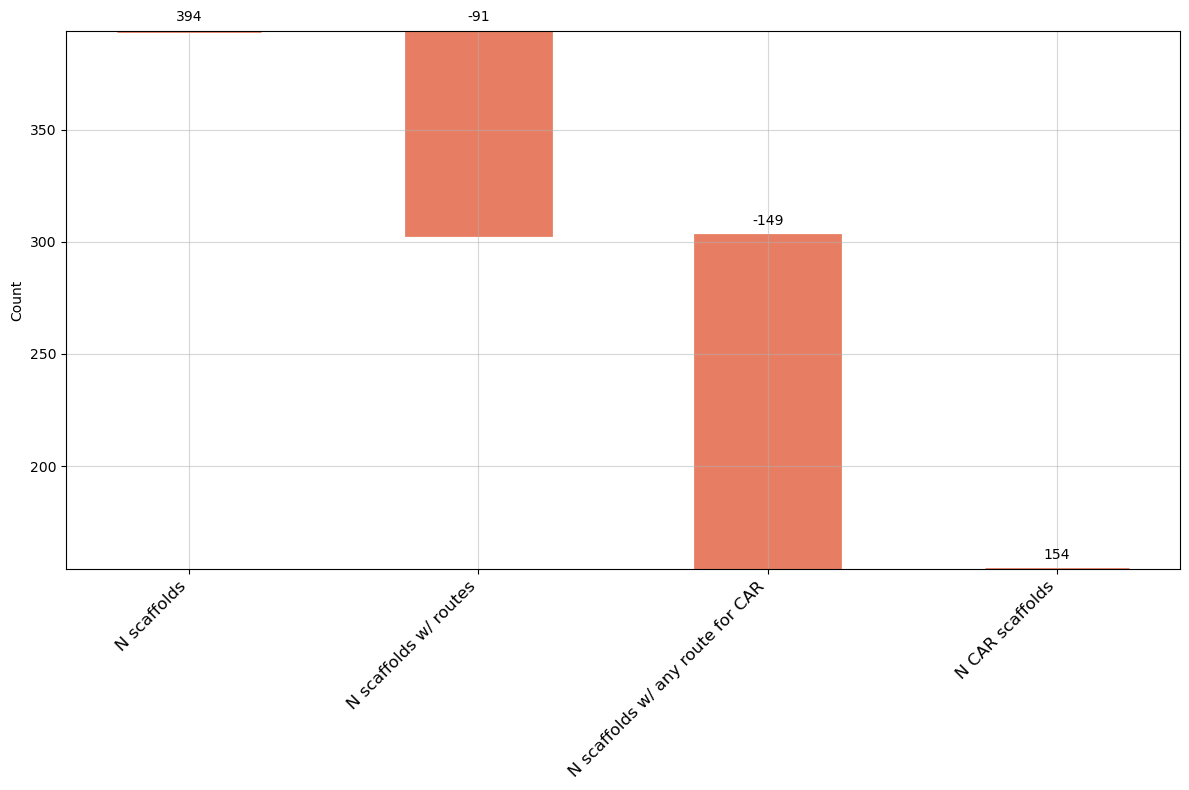

In [86]:
# waterfall plot losing scaffold
waterfall_data: pd.Series = pd.Series({'N scaffolds': 394, 'N scaffolds w/ routes': 303, 'N scaffolds w/ any route for CAR': 154, 'N CAR scaffolds': 154})
fig = make_waterfall_plot(waterfall_data, sns.color_palette("flare", n_colors=4)[0])
fig

In [87]:
# histogram of frequency of routes within the 149 that don't have a CAR route
df_non_CAR = df[df['all_routes_non_CAR']]
counts_non_CAR = pd.concat([df_non_CAR[f'route{i}_non_CAR'] for i in range(5)], axis=0).dropna()
counts_non_CAR.value_counts()

[Sp3-sp2_Macmillan_coupling_alcohol_and_aryl_bromide]                                                                      32
[1,2,4-Oxadiazole_synthesis_(amidoxime_+_carboxylate)]                                                                     21
[Buchwald-Hartwig_(thio)etherification]                                                                                    18
[NHK_reaction]                                                                                                             17
[Hydrogenation_of_pyridine]                                                                                                15
                                                                                                                           ..
[Heck_reaction_(intermolecular), Imine_formation, Aldol_condensation]                                                       1
[Leimgruber-Batcho_indole_synthesis, Sp3-sp2_Macmillan_coupling_with_chloride_(intermolecular), Methylation_of_alcohol

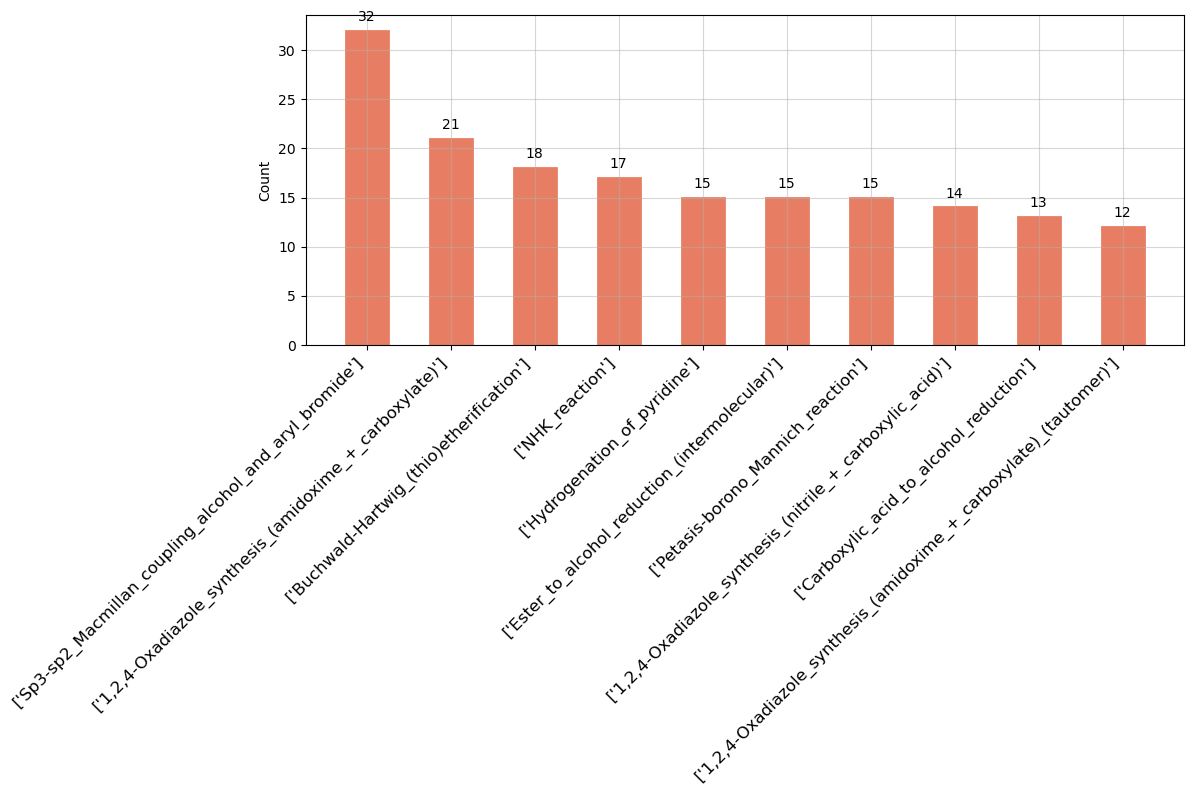

In [88]:
# top 5 routes
make_histogram_plot(counts_non_CAR.value_counts().head(10), sns.color_palette("flare", n_colors=4)[0])

In [99]:
df_non_CAR[[f'route{i}_non_CAR' for i in range(5)]].apply(lambda x: [rxn == counts_non_CAR.value_counts().index[0][0] for rxn in x] , axis=1)

5      [False, False, False, False, False]
9      [False, False, False, False, False]
11     [False, False, False, False, False]
12     [False, False, False, False, False]
14     [False, False, False, False, False]
                      ...                 
388    [False, False, False, False, False]
389    [False, False, False, False, False]
390    [False, False, False, False, False]
392    [False, False, False, False, False]
393    [False, False, False, False, False]
Length: 149, dtype: object

In [119]:
counts_non_CAR.value_counts().index[0][0]

'Sp3-sp2_Macmillan_coupling_alcohol_and_aryl_bromide'

In [117]:
# Check if each reaction in the row matches the most common reaction
macmillan_routes = df_non_CAR[[f'route{i}_non_CAR' for i in range(5)]].apply(lambda x: [rxn == counts_non_CAR.value_counts().index[0] for rxn in x], axis=1)
# number of rows with any True
macmillan_routes.value_counts()

[False, False, False, False, False]    134
[False, False, True, False, False]       2
[True, False, True, True, True]          2
[True, False, False, False, False]       2
[False, False, False, True, False]       2
[True, False, True, False, True]         2
[False, True, False, True, False]        1
[True, True, True, True, True]           1
[True, False, False, False, True]        1
[True, False, False, True, False]        1
[False, True, False, False, False]       1
Name: count, dtype: int64

In [118]:
149-134

15

In [122]:
counts_non_CAR.value_counts().index[1]

['1,2,4-Oxadiazole_synthesis_(amidoxime_+_carboxylate)']

In [120]:
# Check if each reaction in the row matches the most common reaction
exact_rxn_routes = df_non_CAR[[f'route{i}_non_CAR' for i in range(5)]].apply(lambda x: [rxn == counts_non_CAR.value_counts().index[1] for rxn in x], axis=1)
# number of rows with any True
exact_rxn_routes.value_counts()

[False, False, False, False, False]    133
[True, False, False, True, False]        4
[False, True, False, False, False]       4
[True, False, False, False, False]       4
[False, False, True, False, False]       3
[False, True, False, False, True]        1
Name: count, dtype: int64

In [121]:
149-133

16

In [123]:
counts_non_CAR.value_counts().index[2]

['Buchwald-Hartwig_(thio)etherification']

In [125]:
# Check if each reaction in the row matches the most common reaction
exact_rxn_routes = df_non_CAR[[f'route{i}_non_CAR' for i in range(5)]].apply(lambda x: [rxn == counts_non_CAR.value_counts().index[2] for rxn in x], axis=1)
# number of rows with any True
exact_rxn_routes.value_counts()

[False, False, False, False, False]    141
[True, True, False, False, False]        2
[False, False, True, False, False]       1
[True, True, True, True, True]           1
[False, True, False, False, True]        1
[False, False, False, True, False]       1
[False, True, False, False, False]       1
[True, True, True, True, False]          1
Name: count, dtype: int64

In [126]:
149-141

8

In [127]:
counts_non_CAR.value_counts().index[3]

['NHK_reaction']

In [128]:
# Check if each reaction in the row matches the most common reaction
exact_rxn_routes = df_non_CAR[[f'route{i}_non_CAR' for i in range(5)]].apply(lambda x: [rxn == counts_non_CAR.value_counts().index[3] for rxn in x], axis=1)
# number of rows with any True
exact_rxn_routes.value_counts()

[False, False, False, False, False]    141
[True, False, False, True, False]        4
[False, False, True, False, True]        1
[False, False, True, False, False]       1
[True, False, True, True, True]          1
[True, False, True, False, False]        1
Name: count, dtype: int64

In [129]:
149-141

8

In [130]:
counts_non_CAR.value_counts().index[4]

['Hydrogenation_of_pyridine']

In [131]:
# Check if each reaction in the row matches the most common reaction
exact_rxn_routes = df_non_CAR[[f'route{i}_non_CAR' for i in range(5)]].apply(lambda x: [rxn == counts_non_CAR.value_counts().index[4] for rxn in x], axis=1)
# number of rows with any True
exact_rxn_routes.value_counts()

[False, False, False, False, False]    146
[True, True, True, True, True]           3
Name: count, dtype: int64

In [132]:
149-146

3